## Workshop 1a: Introduction to Optimisation with Pyomo

### 1. Installing and Importing Packages 

We first need to pull in all the packages we will be using. Pyomo is a Python-based, open-source optimization modelling language with a diverse set of optimization capabilities. For more information, see the Pyomo [documentation](https://pyomo.readthedocs.io/en/stable/).

In [39]:
import matplotlib.pyplot as plt
from pyomo.environ import *
import numpy as np
from ipywidgets import FloatSlider, interact, widgets
import platform

# Ipopt solver setup for Windows or Linux
def setup_solver():
    os_name = platform.system()
    if os_name == "Windows":
        return "solver/ipopt.exe"
    elif os_name == "Linux":
        !chmod +x "solver/ipopt"
        return "solver/ipopt"


solver_executable = setup_solver()

### 2. Continuous Optimisation Problem Example

#### a. Non-Constrained Problem

$$ 
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2 
$$

$$ 
x_1, x_2 \in \mathbb{R} 
$$



In [41]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr=model.x1**2 + model.x2**2, sense=minimize)

# Create a solver
solver = SolverFactory("ipopt", executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1()}")
print(f"x2: {model.x2()}")
print(f"Objective Value: {model.obj()}")

x1: 0.0
x2: 0.0
Objective Value: 0.0


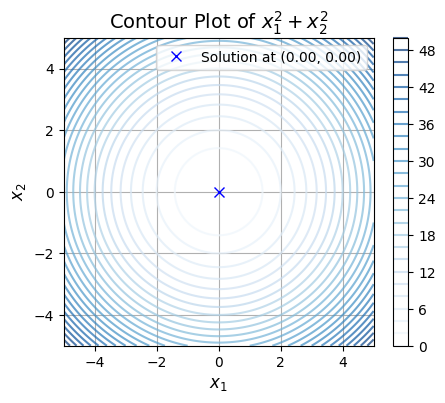

In [3]:
### RUN ME!
# Create a grid of x1 and x2 values
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Highlight the minimum point
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Set plot labels and title
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title("Contour Plot of $x_1^2 + x_2^2$", fontsize=14)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)

#### b. Optimisation Problem with Inequality Constraint

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq 1
$$

$$
x_1, x_2 \in \mathbb{R}
$$

In [45]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr = model.x1**2 + model.x2**2, sense=minimize)

# Add an Equality constraint
model.constr = Constraint(expr=model.x1 + model.x2 >=1)

# Create a solver
solver = SolverFactory('ipopt', executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")
print(f"Obj: {model.obj():.2f}")

x1: 0.50
x2: 0.50
Obj: 0.50


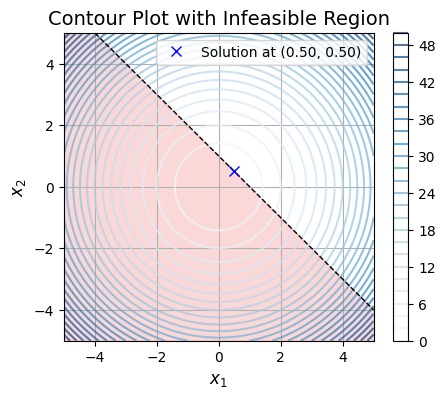

In [27]:
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Plot Infeasible Region
plt.fill_betweenx(
    x1_vals,
    (1 - x1_vals),
    -5,
    where=((1 - x1_vals) >= -5),
    color="lightcoral",
    alpha=0.3,
    #label="$x_1 + x_2 < 1$",
)
plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
)

# Highlight Solution
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Labels & Titles
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title(f"Contour Plot with Infeasible Region", fontsize=14)

# Set plot limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend()
plt.grid(True)
plt.show()


### c. Optimization Problem with Inequality and Equality Constraints

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq 1
$$

$$
\text{s.t.} \quad x_2 = 1
$$

$$
x_1, x_2 \in \mathbb{R}
$$


In [46]:
# Create a model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(domain=Reals)
model.x2 = Var(domain=Reals)

# Objective function
model.obj = Objective(expr=model.x1**2 + model.x2**2, sense=minimize)

# Add an inequality constraint
model.constr2 = Constraint(expr=model.x2 + model.x1 >= 1)

# Add an equality constraint
model.constr1 = Constraint(expr=model.x2 == 1)

# Create a solver
solver = SolverFactory('ipopt', executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")
print(f"Obj: {model.obj():.2f}")

x1: 0.00
x2: 1.00
Obj: 1.00


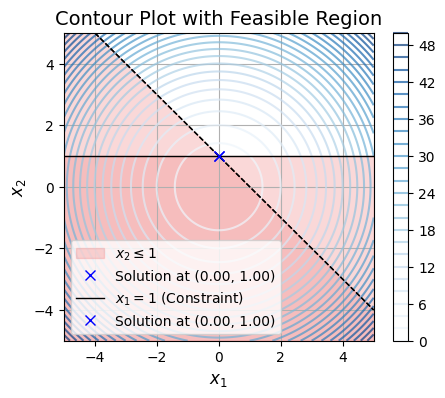

In [35]:
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the objective function x1^2 + x2^2
Z = X1**2 + X2**2

# Create a contour plot
plt.figure(figsize=(5, 4))
contour = plt.contour(X1, X2, Z, levels=30, cmap="Blues", alpha=0.7)
plt.colorbar(contour)

# Plot Infeasible Region
plt.fill_betweenx(
    x1_vals,
    (1 - x1_vals),
    -5,
    where=((1 - x1_vals) >= -5),
    color="lightcoral",
    alpha=0.3,
    #label="$x_1 + x_2 < 1$",
)

# Fill the area where x2 <= 1
plt.fill_betweenx(
    x2_vals,
    -5,  # Start at -5 on the x-axis
    5,    # End at 5 on the x-axis
    where=(x2_vals <= 1),
    color="lightcoral",
    alpha=0.3,
    label="$x_2 \\leq 1$",
)

plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
)

# Highlight Solution
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Add a vertical line at the constraint x1 = -2
plt.axhline(1, color="black", linewidth=1, label="$x_1 = 1$ (Constraint)")
plt.plot(
    x1_vals,
    (1 - x1_vals),
    color="black",
    linestyle="--",
    linewidth=1,
)

# Highlight Solution
plt.plot(
    model.x1(),
    model.x2(),
    "bx",
    markersize=7,
    label=f"Solution at ({model.x1():.2f}, {model.x2():.2f})",
)

# Labels & Titles
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.title(f"Contour Plot with Feasible Region", fontsize=14)

# Set plot limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend()
plt.grid(True)
plt.show()

### d. Interactive Feasibility Region Visualisation

$$
\text{minimize} \quad f(x_1, x_2) = x_1^2 + x_2^2
$$

$$
\text{s.t.} \quad x_1 + x_2 \geq c_1
$$

$$
\quad x_2 = c_2
$$

$$
x_1, x_2 \in \mathbb{R}
$$

In [48]:
### RUN ME! 
def plot_filled_region(C1=1.0, C2=2.0):
    # Create a grid of x1 values
    x1_vals = np.linspace(-5, 5, 400)

    # Define the boundaries based on the slider values
    x2_boundary1 = C1 - x1_vals  # x1 + x2 = C1 -> x2 = C1 - x1
    x2_boundary2 = C2 * np.ones_like(x1_vals)  # x2 = C2

    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Fill the area that satisfies both constraints
    plt.fill_between(
        x1_vals,
        np.maximum(x2_boundary1, C2),  # Fill from the maximum of both boundaries
        5,  # Upper limit (arbitrary large value)
        where=(np.maximum(x2_boundary1, C2) <= 5),  # Ensure we fill within the limits
        color="orange",
        alpha=0.5,
        label=f"Feasible Region: $x_1 + x_2 \\geq {C1}$ and $x_2 \\geq {C2}$",
    )

    # Plot the lines for visualization
    plt.plot(
        x1_vals,
        x2_boundary1,
        color="blue",
        linestyle="-",
        linewidth=2,
        label=f"$x_1 + x_2 = {C1}$",
    )
    plt.plot(
        x1_vals,
        x2_boundary2,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"$x_2 = {C2}$",
    )

    # Set plot limits
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Set plot labels and title
    plt.xlabel("$x_1$", fontsize=12)
    plt.ylabel("$x_2$", fontsize=12)
    plt.title("Interactive Feasible Region Visualization", fontsize=14)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.axhline(0, color="black", linewidth=0.5, ls="--")  # X-axis
    plt.axvline(0, color="black", linewidth=0.5, ls="--")  # Y-axis
    plt.show()

# Create interactive sliders for the constraints
C1_slider = FloatSlider(
    value=1.0, min=0, max=5, step=0.1, description="C1"
)
C2_slider = FloatSlider(
    value=2.0, min=0, max=5, step=0.1, description="C2"
)

# Use interact to link the sliders to the plotting function
interact(plot_filled_region, C1=C1_slider, C2=C2_slider)

interactive(children=(FloatSlider(value=1.0, description='C1', max=5.0), FloatSlider(value=2.0, description='C…

<function __main__.plot_filled_region(C1=1.0, C2=2.0)>

### 3. Simple LP Exploring Lagrange Multipliers

$$
\text{minimize} \quad -x_1 - x_2
$$

$$
\text{s.t.} -x_1 + x_2 \geq 0 
$$

$$

$$

$$
x_1 \leq 2 
$$

$$
x_2 \leq 3 
$$

$$
x_1, x_2 \in \mathbb{R}
$$


#### a. ADD TASK FOR STUDENT

In [ ]:
# Create a model
model = ConcreteModel()

# Define decision variables as integers
model.x1 = Var(domain=NonNegativeIntegers)
model.x2 = Var(domain=NonNegativeIntegers)

# Objective function
model.obj = Objective(expr=-model.x1 - model.x2, sense=minimize)

# Constraints
model.constraint1 = Constraint(expr=model.x1 <= 2)
model.constraint2 = Constraint(expr=model.x2 <= 3)
model.constraint3 = Constraint(expr=-model.x1 + model.x2 >= 0)

# Extract dual values (shadow prices)
model.dual = Suffix(direction=Suffix.IMPORT)

# Create a solver
solver = SolverFactory("ipopt", executable=solver_executable)  # You can change to "cbc", "gurobi", etc.

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")
print(f"Obj: {model.obj():.2f}")

x1: 2.00
x2: 3.00
Obj: -5.00


#### b. Interactive Feasibility Region

In [40]:
# Function to update the plot
def plot_feasible_region(x2_limit, x1_limit):
    # Define the limits for the plot
    x1 = np.linspace(0, 4, 400)
    x2_1 = x1  # Line for x2 = x1
    x2_2 = np.full_like(x1, x2_limit)  # Upper limit for x2

    # Set up the plot
    plt.figure(figsize=(8, 4))

    # Plot the constraints
    plt.plot(x1, x2_1, label=r'$x_2 = x_1$', color='green')
    plt.plot(x1, x2_2, label=f'$x_2 = {x2_limit}$', color='blue')
    plt.axvline(x=x1_limit, color='orange', label=f'$x_1 = {x1_limit}$')

    # Fill the feasible region based on updated constraints
    plt.fill_between(x1, np.maximum(x2_1, 0), x2_2,
                     where=(x1 <= x1_limit) & (x2_2 >= np.maximum(x2_1, 0)), 
                     color='yellow', alpha=0.5, label='Feasible Region')

    # Add integer points in the feasible region
    for x1_val in range(x1_limit + 1):  # x1 can take values from 0 to x1_limit
        for x2_val in range(x1_val, min(x2_limit + 1, 4)):  # x2 starts from x1 and goes up to x2_limit
            if x2_val <= 3:
                plt.plot(x1_val, x2_val, 'ko', markersize=7)  # Blue points for integer solutions

    # Set labels and title
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.ylabel(r'$x_2$', fontsize=14)
    plt.title('Feasible Region and Integer Points', fontsize=16)
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.xticks(np.arange(0, 5, 1))
    plt.yticks(np.arange(0, 5, 1))
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.legend()
    plt.show()

# Create sliders for x2_limit and x1_limit
x2_limit_slider = widgets.IntSlider(value=3, min=0, max=5, step=1, description='x2 limit:')
x1_limit_slider = widgets.IntSlider(value=2, min=0, max=5, step=1, description='x1 limit:')

# Use interactive output to update the plot based on slider values
widgets.interactive(plot_feasible_region, x2_limit=x2_limit_slider, x1_limit=x1_limit_slider)


interactive(children=(IntSlider(value=3, description='x2 limit:', max=5), IntSlider(value=2, description='x1 l…

#### c. Marginal Price Exploration

Using the interactive plot below, determine the range of validity for constraint 1 and 2.

In [ ]:
# Define the marginal prices for each constraint
dual_1 = model.dual[model.constraint1]  
dual_2 = model.dual[model.constraint2]
#dual_3 = model.dual[model.constraint3] 

print("================ Dual Values ================")
print("Constraint x1 <= 2 (dual_1):", f"{-1*dual_1:.2f}")
print("Constraint x2 <= 3 (dual_2):", f"{-1*dual_2:.2f}")
#print("Constraint x2 >= x1 (dual_3):", f"{-1*dual_3:.2f}")

================ Dual Values ================
Constraint x1 <= 2 (dual_1): -1.00
Constraint x2 <= 3 (dual_2): -1.00


#### d. Using Marginal Price to Calculate Recalculate Objective

In [ ]:
# Calculate the change in the objective function for a given change in constraint 2

# Current obj value
print(f"\nCurrent Objective Value: {model.obj():.2f}")

# For example, let's assume we relax constraint 1 by 10 units
change_in_constraint_2 = 10
change_in_objective = -dual_2 * change_in_constraint_2
print(f"\nChange in objective function with +{change_in_constraint_2} on constraint 2: {change_in_objective:.2f}")

new_obj_value = model.obj() + change_in_objective
print(f"\nNew Objective Value: {new_obj_value:.2f}")


Current Objective Value: -5.00

Change in objective function with +10 on constraint 2: -10.00

New Objective Value: -15.00


#### e. Verify Marginal Price Exploration with Re-Solving Problem

In [ ]:
# Create a model
model = ConcreteModel()

# Define decision variables as integers
model.x1 = Var(domain=NonNegativeIntegers)
model.x2 = Var(domain=NonNegativeIntegers)

# Objective function
model.obj = Objective(expr=-model.x1 - model.x2, sense=minimize)

# Constraints
model.constraint1 = Constraint(expr=-model.x1 + model.x2 >= 0)
model.constraint2 = Constraint(expr=model.x1 <= 2)
model.constraint3 = Constraint(expr=model.x2 <= 13)

# Extract dual values (shadow prices)
model.dual = Suffix(direction=Suffix.IMPORT)

# Create a solver
solver = SolverFactory("ipopt", executable=solver_executable)  # You can change to "cbc", "gurobi", etc.

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")

print(f"New Obj: {model.obj():.2f}")

x1: 2.00
x2: 13.00
New Obj: -15.00


### 3. Supply Chain Production and Distribution - Non-Linear Program (NLP)
The optimization problem aims to minimize total costs associated with the production and distribution of two products while satisfying demand constraints at multiple warehouses. The model incorporates decision variables for production quantities at two plants and shipping quantities to warehouses, subject to production capacity limits and demand fulfillment requirements.

$$
\begin{align*}
\text{Minimize} & \quad C \\
\text{s.t.} & \\
& z_1 + z_3 \geq D_1 \\
& z_2 + z_4 \geq D_2 \\
& x_1 + y_1 \leq C_1 \\
& x_2 + y_2 \leq C_2 \\
& x_1, x_2, y_1, y_2, z_1, z_2, z_3, z_4 \geq 0
\end{align*}
$$

#### Objective: Cost Minimisation 
$$
C = \sum (c_{p1} x_1^2 + c_{p2} x_2^2 + c_{p3} y_1^2 + c_{p4} y_2^2) + \sum (t_{a1} z_1 + t_{a2} z_2 + t_{b1} z_3 + t_{b2} z_4)
$$

#### Decision Variables
- $x_1$: Quantity of Product 1 produced at Plant 1
- $x_2$: Quantity of Product 2 produced at Plant 1
- $y_1$: Quantity of Product 1 produced at Plant 2
- $y_2$: Quantity of Product 2 produced at Plant 2
- $z_1$: Quantity of Product 1 shipped to Warehouse A
- $z_2$: Quantity of Product 2 shipped to Warehouse A
- $z_3$: Quantity of Product 1 shipped to Warehouse B
- $z_4$: Quantity of Product 2 shipped to Warehouse B

#### Constraints
1. **Demand constraints**:
$$
\text{For Product 1}: \quad z_1 + z_3 \geq D_1
$$
$$
\text{For Product 2}: \quad z_2 + z_4 \geq D_2
$$

2. **Production capacity constraints**:
$$
\text{For Product 1}: \quad x_1 + y_1 \leq C_1
$$
$$
\text{For Product 2}: \quad x_2 + y_2 \leq C_2
$$

Where:
- $C$ = Total cost
- $c_{p1}, c_{p2}, c_{p3}, c_{p4}$ = Production cost coefficients (non-linear)
- $t_{a1}, t_{a2}, t_{b1}, t_{b2}$ = Transportation costs per unit


#### a. Formulating the Optimisation Problem

In [51]:
model = ConcreteModel()

# Parameters
D1 = 300  # Demand for Product 1
D2 = 250  # Demand for Product 2
C1 = 500  # Capacity for Product 1
C2 = 500  # Capacity for Product 2

# Adjusted Non-linear production costs
cp1, cp2, cp3, cp4 = 0.3, 0.2, 0.4, 0.2  # Production cost coefficients
ta1, ta2, tb1, tb2 = 0.1, 0.1, 0.2, 0.2  # Transportation costs

# Decision variables
model.x1 = Var(within=NonNegativeReals)  # Product 1 at Plant 1
model.x2 = Var(within=NonNegativeReals)  # Product 2 at Plant 1
model.y1 = Var(within=NonNegativeReals)  # Product 1 at Plant 2
model.y2 = Var(within=NonNegativeReals)  # Product 2 at Plant 2
model.z1 = Var(within=NonNegativeReals)  # Product 1 to Warehouse A
model.z2 = Var(within=NonNegativeReals)  # Product 2 to Warehouse A
model.z3 = Var(within=NonNegativeReals)  # Product 1 to Warehouse B
model.z4 = Var(within=NonNegativeReals)  # Product 2 to Warehouse B

# Objective function: Minimize total costs
model.cost = Objective(
    expr=(cp1 * model.x1**2 + cp2 * model.x2**2 +
          cp3 * model.y1**2 + cp4 * model.y2**2 +
          ta1 * model.z1 + ta2 * model.z2 +
          tb1 * model.z3 + tb2 * model.z4),
    sense=minimize)

# Constraints
model.demand1 = Constraint(expr=model.z1 + model.z3 >= D1)  # Demand for Product 1
model.demand2 = Constraint(expr=model.z2 + model.z4 >= D2)  # Demand for Product 2
model.capacity1 = Constraint(expr=model.x1 + model.y1 <= C1)  # Capacity for Product 1
model.capacity2 = Constraint(expr=model.x2 + model.y2 <= C2)  # Capacity for Product 2

# Shipping constraints to ensure that shipments do not exceed production
model.shipping1_A = Constraint(expr=model.z1 <= model.x1)  # Product 1 to Warehouse A
model.shipping3_B = Constraint(expr=model.z3 <= model.x1)  # Product 1 to Warehouse B
model.shipping2_A = Constraint(expr=model.z2 <= model.x2)  # Product 2 to Warehouse A
model.shipping4_B = Constraint(expr=model.z4 <= model.y2)  # Product 2 to Warehouse B

# Extract dual values (shadow prices)
model.dual = Suffix(direction=Suffix.IMPORT)

# Solve the primal model
solver = SolverFactory("ipopt", executable=solver_executable)
results = solver.solve(model)

# Define the shadow prices
u1 = model.dual[model.demand1]  # Shadow price for demand 1
u2 = model.dual[model.demand2]  # Shadow price for demand 2
v1 = model.dual[model.capacity1]  # Shadow price for capacity 1
v2 = model.dual[model.capacity2]  # Shadow price for capacity 2

# Print the optimisation results
print("================ Optimisation Results ================")
print("Objective Value, Total Cost:", f"{model.cost():.3f}", "\n")
print("Decision Variables:")
print("--- Quantity of Product 1 produced at Plant 1 (x_1):", f"{model.x1.value:.3f}")
print("--- Quantity of Product 2 produced at Plant 1 (x_2):", f"{model.x2.value:.3f}", "\n")
print("--- Quantity of Product 1 produced at Plant 2 (y_1):", f"{model.y1.value:.3f}")
print("--- Quantity of Product 2 produced at Plant 2 (y_2):", f"{model.y2.value:.3f}", "\n")
print("--- Quantity of Product 1 shipped to Warehouse A (z_1):", f"{model.z1.value:.3f}")
print("--- Quantity of Product 2 shipped to Warehouse A (z_2):", f"{model.z2.value:.3f}", "\n")
print("--- Quantity of Product 1 shipped to Warehouse B (z_3):", f"{model.z3.value:.3f}")
print("--- Quantity of Product 2 shipped to Warehouse B (z_4):", f"{model.z4.value:.3f}", "\n")


================ Optimisation Results ================
Objective Value, Total Cost: 13082.493 

Decision Variables:
--- Quantity of Product 1 produced at Plant 1 (x_1): 150.000
--- Quantity of Product 2 produced at Plant 1 (x_2): 125.125 

--- Quantity of Product 1 produced at Plant 2 (y_1): 0.000
--- Quantity of Product 2 produced at Plant 2 (y_2): 124.875 

--- Quantity of Product 1 shipped to Warehouse A (z_1): 150.000
--- Quantity of Product 2 shipped to Warehouse A (z_2): 125.125 

--- Quantity of Product 1 shipped to Warehouse B (z_3): 150.000
--- Quantity of Product 2 shipped to Warehouse B (z_4): 124.875 

